## Neural Network Introduction #2

This exercise is adapted from https://www.springboard.com/blog/beginners-guide-neural-network-in-python-scikit-learn-0-18/

Now you have successfully used SciKit Learn's MLP to work on the built-in Breast Cancer Data Set, let's try another one!

Download the wine dataset from UCI Machine learning repository (http://archive.ics.uci.edu/ml/datasets/Wine/). Import the dataset into a pandas dataframe

In [1]:
import pandas as pd
wine = pd.read_csv('./Data/Wine.csv')

Check out the dataframe - what are the first few rows of data?

In [2]:
wine.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [10]:
# find out the attributes in the dataset
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Customer_Segment      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [8]:
# find out the total instances and number of features
wine.shape

(178, 14)

In [74]:
# use describe to find out more about the data
wine.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic_Acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Ash_Alcanity,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Total_Phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid_Phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
Color_Intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


<AxesSubplot:>

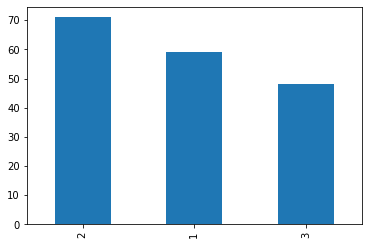

In [11]:
wine['Customer_Segment'].value_counts().plot(kind='bar')

**Q:** what can you say about this dataset?


- There's no missing value
- Each feature's data is widely distributed, standardization is needed
- Target is fairly distributed

Now, set up the data (x) and labels (y)

In [12]:
dataset = wine.values
X = dataset[:,0:-1].astype(float)
y = dataset[:,-1]

#### Train Test Split
 
Let's split our data into training and testing sets, this is done easily with SciKit Learn's train_test_split function from model_selection:

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Data Preprocessing
 
The neural network may have difficulty converging before the maximum number of iterations allowed if the data is not normalized. Multi-layer Perceptron is sensitive to feature scaling, so it is highly recommended to scale your data. Note that you must apply the same scaling to the test set for meaningful results. There are a lot of different methods for normalization of data, we will use the built-in StandardScaler for standardization.

In [14]:
# Import the StandardScalar library
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# Fit only to the training data
sc.fit(X_train)

StandardScaler()

In [15]:
# Now apply the transformations to the data:
X_train  = sc.transform (X_train)
X_test  = sc.transform (X_test)

#### Training the model
 
Now it is time to train our model. SciKit Learn makes this incredibly easy, by using estimator objects. In this case we will import our estimator (the Multi-Layer Perceptron Classifier model) from the neural_network library of SciKit-Learn!

In [16]:
from sklearn.neural_network import MLPClassifier

Next we create an instance of the model, there are a lot of parameters you can choose to define and customize here, we will only define the hidden_layer_sizes. For this parameter you pass in a tuple consisting of the number of neurons you want at each layer, where the nth entry in the tuple represents the number of neurons in the nth layer of the MLP model. There are many ways to choose these numbers, but for simplicity we will choose 3 layers with the same number of neurons as there are features in our data set:

In [17]:
# create a Multilayerperceptron classifier and call it mlp
mlp = MLPClassifier(hidden_layer_sizes=(13, 13, 13), random_state=42)

Now that the model has been made we can fit the training data to our model, remember that this data has already been processed and scaled:

In [18]:
clf  = mlp.fit(X_train, y_train)

C:\Users\tangkaiv\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


**Q:** What do you see in the output? What does it tell you?

- Maximum iterations reached and optimization hasn't converged
- More run is needed

#### Predictions and Evaluation
 
Now that we have a model it is time to use it to get predictions! We can do this simply with the predict() method off of our fitted model:

In [19]:
y_pred = clf.predict(X_test)

Now we can use SciKit-Learn's built in metrics such as a classification report and confusion matrix to evaluate how well our model performed:

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        14
         2.0       1.00      1.00      1.00        14
         3.0       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



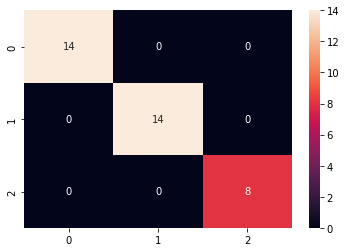

In [72]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns

sns.heatmap(confusion_matrix(y_test,y_pred), annot=True)
print(classification_report(y_test, y_pred))

**Q:** what conclusion can you make from the confusion matrix?

- Seems overfitting

#### Weights and biases

The downside however to using a Multi-Layer Preceptron model is how difficult it is to interpret the model itself. The weights and biases won't be easily interpretable in relation to which features are important to the model itself.

To extract the MLP weights and biases after training your model, you use its public attributes coefs_ and intercepts_.

In [65]:
# Print the coefficient values and interpret it

for x in mlp.coefs_:
    for y in x:
        print(str(len(x)) + ',' + str(len(y)))
    print("------------------------------")   
    

13,13
13,13
13,13
13,13
13,13
13,13
13,13
13,13
13,13
13,13
13,13
13,13
13,13
------------------------------
13,13
13,13
13,13
13,13
13,13
13,13
13,13
13,13
13,13
13,13
13,13
13,13
13,13
------------------------------
13,13
13,13
13,13
13,13
13,13
13,13
13,13
13,13
13,13
13,13
13,13
13,13
13,13
------------------------------
13,3
13,3
13,3
13,3
13,3
13,3
13,3
13,3
13,3
13,3
13,3
13,3
13,3
------------------------------


In [67]:
# Print the intercepts values and interpret it

for x in mlp.intercepts_:
    print(len(x))


13
13
13
3


In [68]:
mlp.intercepts_

[array([ 0.22572696,  0.2816932 , -0.30564877,  0.0957832 , -0.15453563,
         0.27942284, -0.27653215,  0.23465765, -0.1601996 ,  0.59171998,
        -0.19943846, -0.27326665, -0.19084976]),
 array([ 0.18914649,  0.25914756, -0.22958128, -0.33456865,  0.17590116,
        -0.27990709,  0.16098038,  0.59318125,  0.0963413 ,  0.0421705 ,
         0.32740759, -0.05459201,  0.0950298 ]),
 array([ 0.15279442,  0.18728225,  0.33802072,  0.51162939, -0.08293407,
        -0.14642472, -0.18605553,  0.52777391,  0.25236106, -0.26769042,
         0.28575722,  0.01030555, -0.21594643]),
 array([-0.12799852, -0.43272747, -0.57001619])]

**Q:** What do you understand from the two values?

- Coefs seems to be input (I)?
- Intercepts is the weight (W)?

#### Additional optional tasks...

select a few known supervised techniques and compare their performance. Use 10 fold cross validation

In [27]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report

seed = 42

def train_and_test_model(X_train, y_train, X_test, y_test, model):
    cv = StratifiedKFold(10, shuffle=True, random_state=seed)
    scores = cross_val_score(model, X_train, y_train, cv=cv)
    print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

In [28]:
dt = DecisionTreeClassifier()
train_and_test_model(X_train, y_train, X_test, y_test, dt)

0.91 accuracy with a standard deviation of 0.08
[[13  1  0]
 [ 0 14  0]
 [ 0  1  7]]
              precision    recall  f1-score   support

         1.0       1.00      0.93      0.96        14
         2.0       0.88      1.00      0.93        14
         3.0       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.96      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36



In [29]:
rf = RandomForestClassifier()
train_and_test_model(X_train, y_train, X_test, y_test, rf)

0.98 accuracy with a standard deviation of 0.05
[[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        14
         2.0       1.00      1.00      1.00        14
         3.0       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



In [30]:
gbt = GradientBoostingClassifier()
train_and_test_model(X_train, y_train, X_test, y_test, gbt)

0.94 accuracy with a standard deviation of 0.06
[[14  0  0]
 [ 1 13  0]
 [ 0  1  7]]
              precision    recall  f1-score   support

         1.0       0.93      1.00      0.97        14
         2.0       0.93      0.93      0.93        14
         3.0       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.95      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36



In [31]:
mlp = MLPClassifier(hidden_layer_sizes=(13, 13, 13), random_state=42)
train_and_test_model(X_train, y_train, X_test, y_test, mlp)

C:\Users\tangkaiv\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\tangkaiv\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\tangkaiv\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\tangkaiv\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\tangkaiv\Anaconda3\lib\site-packages\sklearn\neural

0.96 accuracy with a standard deviation of 0.05
[[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        14
         2.0       1.00      1.00      1.00        14
         3.0       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



C:\Users\tangkaiv\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
